## <span style="color:navy">  Exercises 10 - Optimization techniques</span>


Last time we employed the Genetic Algorithm as optimization technique to explore the global optimum of the Travelling Salesman Problem. This time we are asked to implement one of two other metheuristic methods: the simulated annealing and the parallel tempeting.

## 10.1 - Parallel Tempering

The basic idea of PT is to perform the same simulation in parallel with multiple nodes, changing input data, in order to better explore the space of configurations and the evolution of the algorithm. The purpose is to reach the global optimum avoiding to be trapped in some metastable configuration.

Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)**. The candidate solution of the TSP will appear on the node with the lower temperature.

I have implemented the exercise with 4 computing nodes, because my computer couldn't perform on 11 nodes.

## 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

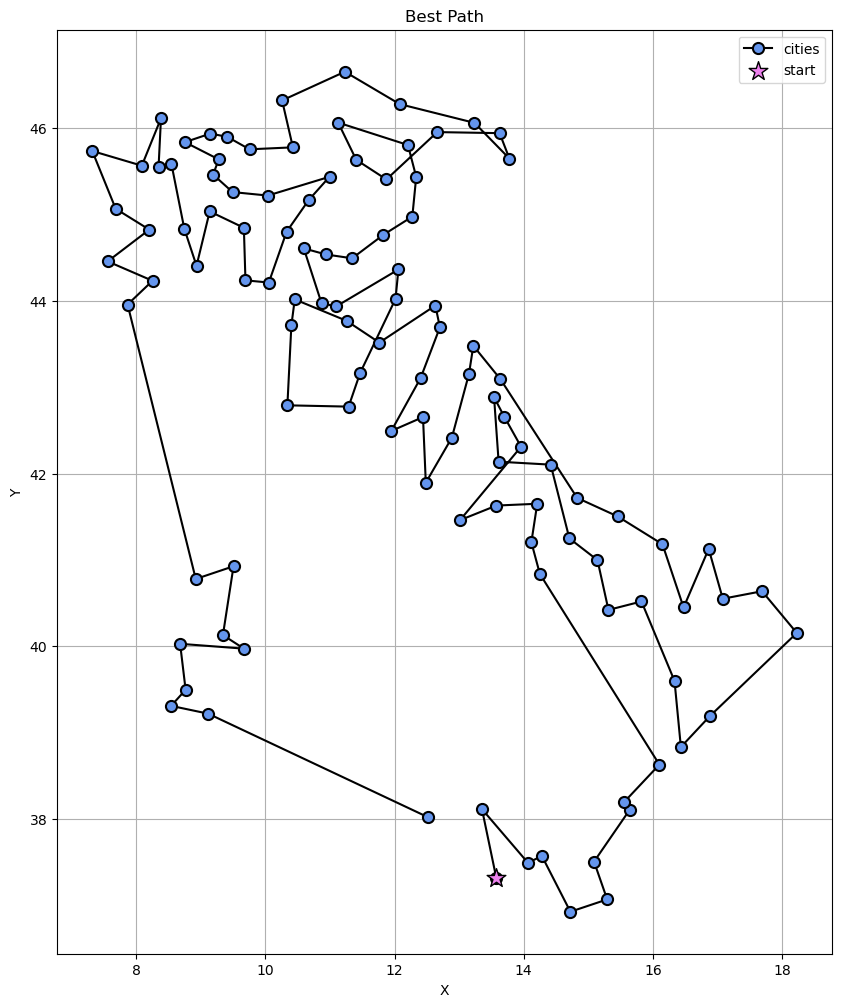

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
x, y = np.loadtxt('best_tour_coordinates.txt',usecols=(0, 1), unpack=True )

# Create a figure and axis
plt.figure(figsize=(10, 12))

# Plot the path
plt.plot(x, y, marker='o', linestyle='-', color='black', markerfacecolor='Cornflowerblue', 
         markersize=8, markeredgewidth=1.5, label='cities')

# Highlight the starting point
plt.scatter(x[0], y[0], s=200, color='violet', edgecolor='black', zorder=10, 
            marker='*', label='start')

# Add labels and title
plt.title('Best Path')
plt.xlabel('X')
plt.ylabel('Y')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


This is the best lenght $L=78$ obtaind with 4 communicating processors and 5000 generations of 200 chromosomes each.

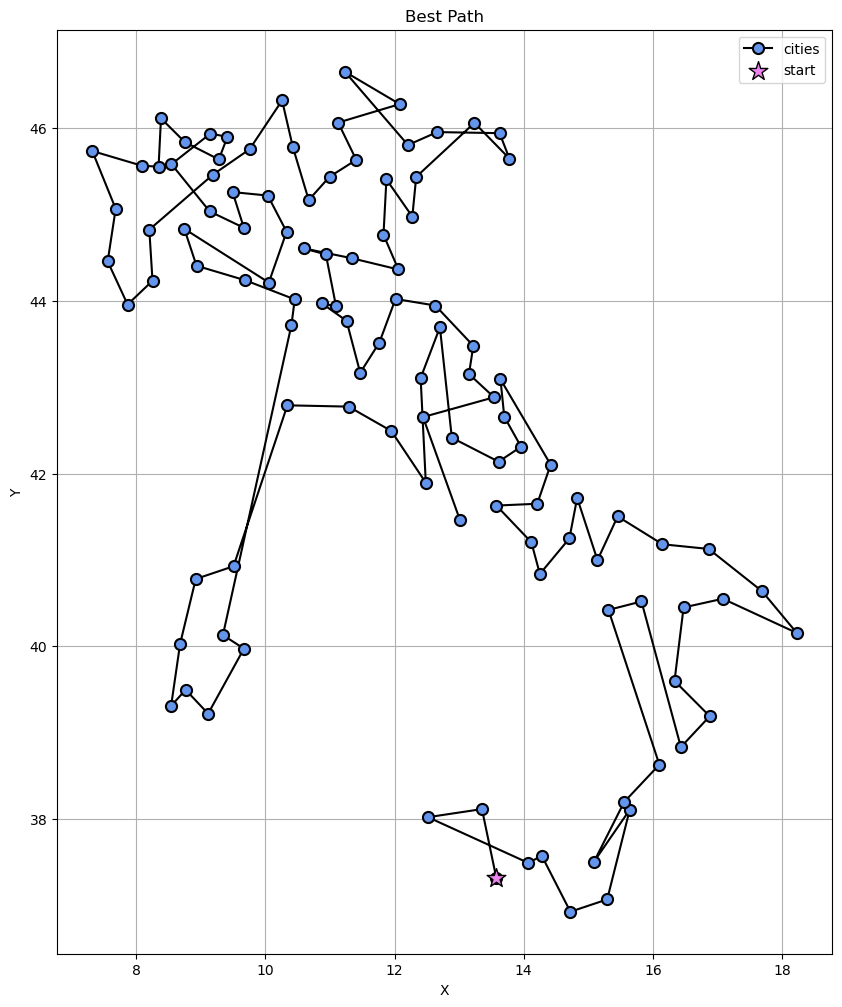

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
x, y = np.loadtxt('best_tour_coordinates_6.txt',usecols=(0, 1), unpack=True )

# Create a figure and axis
plt.figure(figsize=(10, 12))

# Plot the path
plt.plot(x, y, marker='o', linestyle='-', color='black', markerfacecolor='Cornflowerblue', 
         markersize=8, markeredgewidth=1.5, label='cities')

# Highlight the starting point
plt.scatter(x[0], y[0], s=200, color='violet', edgecolor='black', zorder=10, 
            marker='*', label='start')

# Add labels and title
plt.title('Best Path')
plt.xlabel('X')
plt.ylabel('Y')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


This is the best lenght $L= 81.6713 $ obtaind with 6 communicating processors and 5000 generations of 200 chromosomes each.

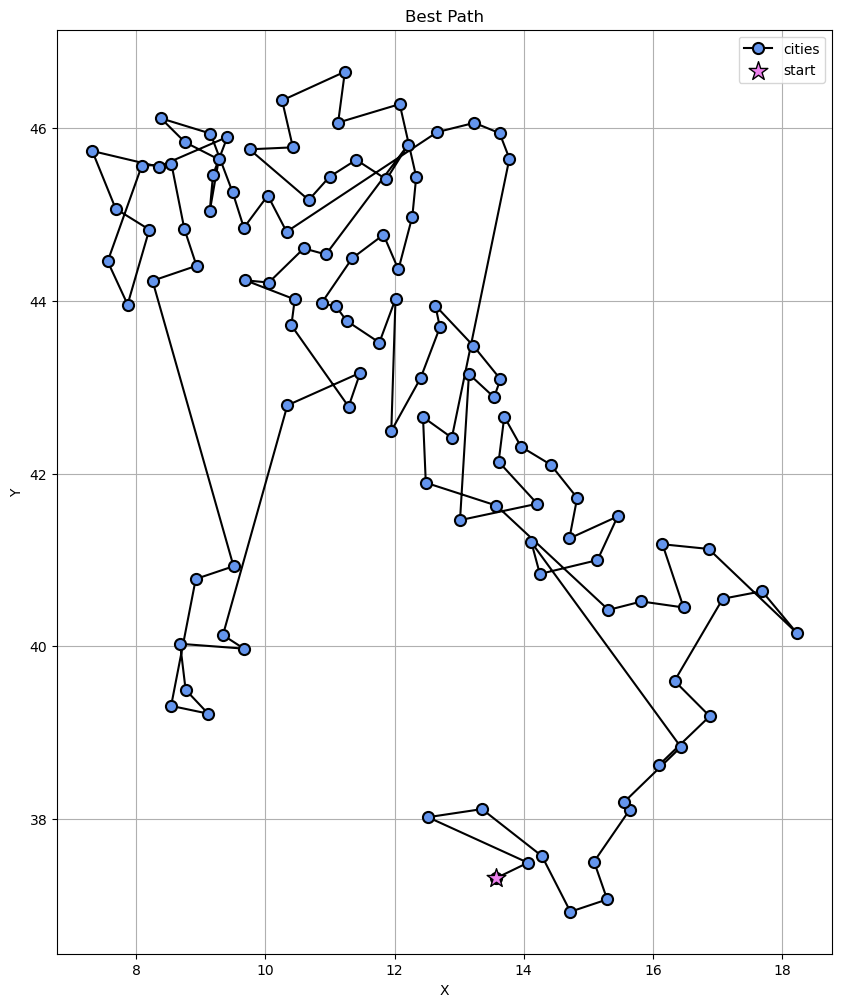

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
x, y = np.loadtxt('best_tour_coordinates_6.txt',usecols=(0, 1), unpack=True )

# Create a figure and axis
plt.figure(figsize=(10, 12))

# Plot the path
plt.plot(x, y, marker='o', linestyle='-', color='black', markerfacecolor='Cornflowerblue', 
         markersize=8, markeredgewidth=1.5, label='cities')

# Highlight the starting point
plt.scatter(x[0], y[0], s=200, color='violet', edgecolor='black', zorder=10, 
            marker='*', label='start')

# Add labels and title
plt.title('Best Path')
plt.xlabel('X')
plt.ylabel('Y')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


This is the best lenght $L=86.2918$ obtaind with 4  non communicating processors and 5000 generations of 200 chromosomes each.

This is the best lenght $L=78$ obtaind with 6 non communicating processors and 5000 generations of 200 chromosomes each.